In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import datetime as dt
import warnings

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [3]:
adaniGREEN = pd.read_csv('ADANIGREEN.csv')
adaniPORTS = pd.read_csv('ADANIPORTS.csv')
adaniPOWER = pd.read_csv('ADANIPOWER.csv')
adaniTRANS = pd.read_csv('ADANITRANS.csv')
adaniTGL = pd.read_csv('ATGL.csv')
adaniWILMAR = pd.read_csv('AWL.csv')
adaniENT = pd.read_csv('ADANIENT.csv')
adaniENT.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,08-May-2023,EQ,"1,920.30","1,926.90","1,876.00","1,920.30","1,892.00","1,887.50","1,893.79","4,190.00","1,017.45","2,835,197","5,369,263,788.00","101,164"
1,05-May-2023,EQ,"1,954.80","1,955.00","1,903.15","1,911.25","1,919.20","1,920.30","1,930.87","4,190.00","1,017.45","6,137,744","11,851,215,203.30","207,327"
2,04-May-2023,EQ,"1,839.05","1,935.00","1,839.05","1,839.00","1,925.00","1,911.25","1,886.78","4,190.00","1,017.45","4,842,127","9,136,040,023.05","168,632"
3,03-May-2023,EQ,"1,919.00","1,940.00","1,785.35","1,919.85","1,834.00","1,839.00","1,856.55","4,190.00","1,017.45","5,849,432","10,859,776,808.70","228,734"
4,02-May-2023,EQ,"1,935.00","1,966.00","1,908.00","1,924.95","1,919.00","1,919.85","1,932.34","4,190.00","1,017.45","3,813,963","7,369,855,740.30","143,521"


In [4]:
column_names = ['Date','Series','Open_Price','High_Price','Low_Price',
                'Previous_Close','LTP','Close_Price','VWAP','52Week_Highest',
                '52Week_Lowest','Volume','Value','No. of Trades']
# Array of all the dataframe
df_names = [adaniGREEN,adaniPORTS,adaniPOWER,adaniENT,adaniTGL,adaniTRANS,adaniWILMAR]

In [5]:
for df in df_names:
    df.columns = column_names

In [6]:
adaniWILMAR.columns

Index(['Date', 'Series', 'Open_Price', 'High_Price', 'Low_Price',
       'Previous_Close', 'LTP', 'Close_Price', 'VWAP', '52Week_Highest',
       '52Week_Lowest', 'Volume', 'Value', 'No. of Trades'],
      dtype='object')

In [7]:
adaniENT.dtypes

Date              object
Series            object
Open_Price        object
High_Price        object
Low_Price         object
Previous_Close    object
LTP               object
Close_Price       object
VWAP              object
52Week_Highest    object
52Week_Lowest     object
Volume            object
Value             object
No. of Trades     object
dtype: object

In [8]:
def convert_to_float(x):
    return float(x.replace(',',''))

df_names # The names of all the dataframes
column_names # The names of all the columns in dataframe
"""
Columns with string objects to be converted in float type
"""
str_col = column_names[2:]

for df in df_names:
    for col in str_col:
        if df[col].dtype=='O':  # Check whether the column is object type or not
            df[col] = df[col].apply(convert_to_float)
adaniENT.dtypes  # Let's check for the one dataframe

Date               object
Series             object
Open_Price        float64
High_Price        float64
Low_Price         float64
Previous_Close    float64
LTP               float64
Close_Price       float64
VWAP              float64
52Week_Highest    float64
52Week_Lowest     float64
Volume            float64
Value             float64
No. of Trades     float64
dtype: object

In [9]:
adaniENT.head(3)

,Date,Series,Open_Price,High_Price,Low_Price,Previous_Close,LTP,Close_Price,VWAP,52Week_Highest,52Week_Lowest,Volume,Value,No. of Trades
0,08-May-2023,EQ,1920.30,1926.9,1876.00,1920.30,1892.0,1887.50,1893.79,4190.0,1017.45,2835197.0,5.369264e+09,101164.0
1,05-May-2023,EQ,1954.80,1955.0,1903.15,1911.25,1919.2,1920.30,1930.87,4190.0,1017.45,6137744.0,1.185122e+10,207327.0
2,04-May-2023,EQ,1839.05,1935.0,1839.05,1839.00,1925.0,1911.25,1886.78,4190.0,1017.45,4842127.0,9.136040e+09,168632.0


In [10]:
desc = adaniENT.describe()
desc = desc.style.background_gradient()
desc

,Open_Price,High_Price,Low_Price,Previous_Close,LTP,Close_Price,VWAP,52Week_Highest,52Week_Lowest,Volume,Value,No. of Trades
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,2242.397024,2300.650000,2141.284524,2236.629167,2211.892262,2213.166667,2220.696071,4190.000000,1157.057143,8318509.619048,15804102586.513689,353441.357143
std,819.410604,802.824897,816.528274,820.069779,801.359792,801.086388,803.894602,0.000000,228.751889,8462757.274950,14647438148.545086,344525.620053
min,1145.000000,1313.800000,1017.450000,1193.500000,1187.550000,1193.500000,1222.370000,4190.000000,1017.450000,753981.000000,2903281089.000000,38042.000000
25%,1766.975000,1824.050000,1687.487500,1747.437500,1748.612500,1747.437500,1755.977500,4190.000000,1017.450000,2761998.000000,5839026244.937500,104022.000000
50%,1854.500000,1905.425000,1805.550000,1847.575000,1847.825000,1847.575000,1855.665000,4190.000000,1017.450000,5378677.000000,10692039587.025002,226020.500000
75%,2882.500000,3017.450000,2122.150000,2794.300000,2357.125000,2313.550000,2621.517500,4190.000000,1528.800000,11393163.500000,21413853472.262497,516750.500000
max,3870.000000,3880.000000,3822.550000,3858.350000,3853.000000,3855.300000,3850.600000,4190.000000,1528.800000,43885579.000000,63007692681.800003,1704970.000000


In [11]:
for df in df_names:
    df['Date'] = pd.to_datetime(df['Date'])

In [12]:
adaniTGL.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open_Price,84.0,1.630019e+03,1.163772e+03,650.00,8.980000e+02,9.520000e+02,1.999500e+03,3.939000e+03
High_Price,84.0,1.657602e+03,1.180665e+03,678.55,9.229250e+02,9.770250e+02,2.037850e+03,4.000000e+03
Low_Price,84.0,1.591654e+03,1.127099e+03,650.00,8.792000e+02,9.250250e+02,1.950100e+03,3.865150e+03
Previous_Close,84.0,1.653127e+03,1.169722e+03,678.55,9.027375e+02,9.488250e+02,2.166750e+03,3.918900e+03
LTP,84.0,1.619320e+03,1.150720e+03,678.55,8.961875e+02,9.484250e+02,1.950100e+03,3.912000e+03
Close_Price,84.0,1.619556e+03,1.150790e+03,678.55,8.961000e+02,9.476250e+02,1.950100e+03,3.918900e+03
VWAP,84.0,1.621736e+03,1.149347e+03,678.55,9.007125e+02,9.485950e+02,1.982350e+03,3.921810e+03
52Week_Highest,84.0,3.999821e+03,3.852933e-01,3999.00,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03
52Week_Lowest,84.0,1.095520e+03,5.628919e+02,650.00,6.500000e+02,6.500000e+02,1.910050e+03,1.948000e+03
Volume,84.0,1.168253e+06,1.453903e+06,44997.00,3.122665e+05,5.480190e+05,1.310060e+06,7.387370e+06


In [13]:
adaniTGL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            84 non-null     datetime64[ns]
 1   Series          84 non-null     object        
 2   Open_Price      84 non-null     float64       
 3   High_Price      84 non-null     float64       
 4   Low_Price       84 non-null     float64       
 5   Previous_Close  84 non-null     float64       
 6   LTP             84 non-null     float64       
 7   Close_Price     84 non-null     float64       
 8   VWAP            84 non-null     float64       
 9   52Week_Highest  84 non-null     float64       
 10  52Week_Lowest   84 non-null     float64       
 11  Volume          84 non-null     float64       
 12  Value           84 non-null     float64       
 13  No. of Trades   84 non-null     float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 9

In [14]:
# Stock price change
names = ['adaniGREEN' ,'adaniPORTS','adaniPOWER','adaniENT','adaniTGL','adaniTRANS','adaniWILMAR']
colors =["#2CA02C", "#1616A7", "#7E7DCD","rgb(166,216,84)",'skyblue', "#17BECF",'#316395']
i=0
for df,name in zip(df_names,names):
    fig=px.line(df,x='Date',y=['Close_Price','52Week_Highest','52Week_Lowest'],
                     template='plotly_dark',
                     color_discrete_sequence=[colors[i],'rgb(255,127,0)','rgb(228,26,28)'],
                     title='{} Stock Price Over Time'.format(name)
               )
    fig.show()
    i+=1
    print()


In [15]:
# Stock price daily fluctuations
names = ['adaniGREEN' ,'adaniPORTS','adaniPOWER','adaniENT','adaniTGL','adaniTRANS','adaniWILMAR']
for df,name in zip(df_names,names):
    fig=px.line(
                df,x='Date',y=['Close_Price','High_Price','Low_Price'],
                template='plotly_dark',
                color_discrete_sequence=['red','#FECB52','rgb(230,245,201)'],
                title='{} Stock Price Over Time'.format(name)
               )
    fig.show()
    print()

In [16]:
# Certain increase in the volume of transaction is observed after the Hindernberg report and at the same
# time the stocks price of the Adani's stocks were fluctuating alot
names = ['adaniGREEN' ,'adaniPORTS','adaniPOWER','adaniENT','adaniTGL','adaniTRANS','adaniWILMAR']
colors =["#2CA02C", "#1616A7", "#7E7DCD","rgb(166,216,84)",'skyblue', "#17BECF",'#316395']
i=0
for df,name in zip(df_names,names):
    fig=px.histogram(
                     df,x='Date',y=['Volume','No. of Trades'],
                     template='plotly_dark',
                     nbins=53,
                     color_discrete_sequence=[colors[i],'rgb(229,134,6)'],
                     title='{} Volume (Transactions)'.format(name)
                   )
    fig.show()
    i+=1
    print()


In [17]:
names = ['adaniGREEN' ,'adaniPORTS','adaniPOWER','adaniENT','adaniTGL','adaniTRANS','adaniWILMAR']
colors =["#2CA02C", "#1616A7", "#7E7DCD","rgb(166,216,84)",'skyblue', "#17BECF",'#316395']
i=0
for df,name in zip(df_names,names):
    fig=px.line(df,x='Date',y=['Value'],
                     template='plotly_dark',
                     color_discrete_sequence=[colors[i]],
                     title='{} Value (Turnover) Over Time'.format(name)
               )
    fig.show()
    i+=1
    print()

In [18]:
# Stock price of all the companies
stock_price = adaniENT[['Date']].copy()
names = ['adaniGREEN' ,'adaniPORTS','adaniPOWER','adaniENT','adaniTGL','adaniTRANS','adaniWILMAR']
for df,name in zip(df_names,names):
    stock_price['{}'.format(name)] = df['Close_Price']
print()
print('Dataframe containing "Close_Price" of stocks for All the Companies')
print()
stock_price.head()


Dataframe containing "Close_Price" of stocks for All the Companies



,Date,adaniGREEN,adaniPORTS,adaniPOWER,adaniENT,adaniTGL,adaniTRANS,adaniWILMAR
0,2023-05-08,917.30,685.10,238.70,1887.50,872.90,949.05,393.25
1,2023-05-05,940.55,683.90,239.85,1920.30,918.80,999.00,397.00
2,2023-05-04,945.55,679.75,238.15,1911.25,930.20,1011.55,399.00
3,2023-05-03,942.05,669.65,231.65,1839.00,922.95,993.05,397.45
4,2023-05-02,974.65,681.50,235.95,1919.85,959.05,1021.95,415.45


In [19]:
stock_price
colors =["#2CA02C", "#1616A7", "#7E7DCD","rgb(166,216,84)",'skyblue', "#17BECF",'#316395']
names = ['adaniGREEN' ,'adaniPORTS','adaniPOWER','adaniENT','adaniTGL','adaniTRANS','adaniWILMAR']
fig=px.line(stock_price,
            x='Date',
            y=names,
            template='plotly_dark',
            color_discrete_sequence=colors,
            title='Stock Price Comparison of All the Companies'
           )
fig.show()

In [20]:
# 52 week Highest & Lowest Stock price of all the companies
High_Low_Prices52W = adaniENT[['Date']].copy()
names = ['adaniGREEN' ,'adaniPORTS','adaniPOWER','adaniENT','adaniTGL','adaniTRANS','adaniWILMAR']
for df,name in zip(df_names,names):
    High_Low_Prices52W['{}_H'.format(name)] = df['52Week_Highest']
    High_Low_Prices52W['{}_L'.format(name)] = df['52Week_Lowest']

print('\nDataframe containing "52Week_Highest" & "52Week_Lowest" of All the Companies')
print('adaniGREEN_H : 52 week Highet price for adaniGREEN')
print('adaniGREEN_L : 52 week Lowest price for adaniGREEN\n')

High_Low_Prices52W.head()


Dataframe containing "52Week_Highest" & "52Week_Lowest" of All the Companies
adaniGREEN_H : 52 week Highet price for adaniGREEN
adaniGREEN_L : 52 week Lowest price for adaniGREEN



,Date,adaniGREEN_H,adaniGREEN_L,adaniPORTS_H,adaniPORTS_L,adaniPOWER_H,adaniPOWER_L,adaniENT_H,adaniENT_L,adaniTGL_H,adaniTGL_L,adaniTRANS_H,adaniTRANS_L,adaniWILMAR_H,adaniWILMAR_L
0,2023-05-08,2840.0,439.1,987.85,395.1,432.5,132.4,4190.0,1017.45,4000.0,650.0,4236.75,631.5,841.7,327.25
1,2023-05-05,2955.0,439.1,987.85,395.1,432.5,132.4,4190.0,1017.45,4000.0,650.0,4236.75,631.5,841.7,327.25
2,2023-05-04,2955.0,439.1,987.85,395.1,432.5,132.4,4190.0,1017.45,4000.0,650.0,4236.75,631.5,841.7,327.25
3,2023-05-03,2955.0,439.1,987.85,395.1,432.5,132.4,4190.0,1017.45,4000.0,650.0,4236.75,631.5,841.7,327.25
4,2023-05-02,2955.0,439.1,987.85,395.1,432.5,132.4,4190.0,1017.45,4000.0,650.0,4236.75,631.5,841.7,327.25


In [21]:
colors =["#2CA02C", "#1616A7", "#7E7DCD","rgb(166,216,84)",'skyblue', "#17BECF",'#316395']
names_H = ['adaniGREEN_H' ,'adaniPORTS_H','adaniPOWER_H','adaniENT_H','adaniTGL_H','adaniTRANS_H','adaniWILMAR_H']
names_L = ['adaniGREEN_L' ,'adaniPORTS_L','adaniPOWER_L','adaniENT_L','adaniTGL_L','adaniTRANS_L','adaniWILMAR_L']
fig=px.line(High_Low_Prices52W,
            x='Date',
            y=names_H,
            template='plotly_dark',
            color_discrete_sequence=colors,
            title='Highest Price in 52 week Comparison of All the Companies'
           )
fig.show()
print()
fig=px.line(High_Low_Prices52W,
            x='Date',
            y=names_L,
            template='plotly_dark',
            color_discrete_sequence=colors,
            title='Lowest in 52 week Comparison of All the Companies'
           )
fig.show()

In [22]:
# No. of Trades of all the companies
trades = adaniENT[['Date']].copy()
names = ['adaniGREEN' ,'adaniPORTS','adaniPOWER','adaniENT','adaniTGL','adaniTRANS','adaniWILMAR']
for df,name in zip(df_names,names):
    trades['{}'.format(name)] = df['No. of Trades']
print()
print('Dataframe containing "No. of Trades" of All the Companies')
print()
trades.head()


Dataframe containing "No. of Trades" of All the Companies



,Date,adaniGREEN,adaniPORTS,adaniPOWER,adaniENT,adaniTGL,adaniTRANS,adaniWILMAR
0,2023-05-08,83982.0,58366.0,65958.0,101164.0,26918.0,13827.0,32016.0
1,2023-05-05,64518.0,65110.0,56890.0,207327.0,15575.0,15155.0,24890.0
2,2023-05-04,76979.0,87207.0,74755.0,168632.0,17759.0,14595.0,31706.0
3,2023-05-03,74453.0,82651.0,154532.0,228734.0,33247.0,31398.0,80447.0
4,2023-05-02,80064.0,99001.0,75708.0,143521.0,46356.0,49313.0,38938.0


In [23]:
colors =["#2CA02C", "#1616A7", "#7E7DCD","rgb(166,216,84)",'skyblue', "#17BECF",'#316395']
names = ['adaniGREEN' ,'adaniPORTS','adaniPOWER','adaniENT','adaniTGL','adaniTRANS','adaniWILMAR']
fig=px.line(trades,
            x='Date',
            y=names,
            template='plotly_dark',
            color_discrete_sequence=colors,
            title='No. of Trades Comparison of All the Companies'
           )
fig.show()

In [24]:
for df in df_names:
    df.set_index("Date", inplace=True)
df.head(3)

,Series,Open_Price,High_Price,Low_Price,Previous_Close,LTP,Close_Price,VWAP,52Week_Highest,52Week_Lowest,Volume,Value,No. of Trades
Date,,,,,,,,,,,,,
2023-05-08,EQ,399.4,400.00,392.00,397.00,392.7,393.25,394.09,841.7,327.25,1414041.0,5.572612e+08,32016.0
2023-05-05,EQ,400.0,403.55,396.05,399.00,397.5,397.00,398.95,841.7,327.25,1147292.0,4.577133e+08,24890.0
2023-05-04,EQ,392.6,401.50,389.05,397.45,399.4,399.00,398.31,841.7,327.25,1678816.0,6.686848e+08,31706.0


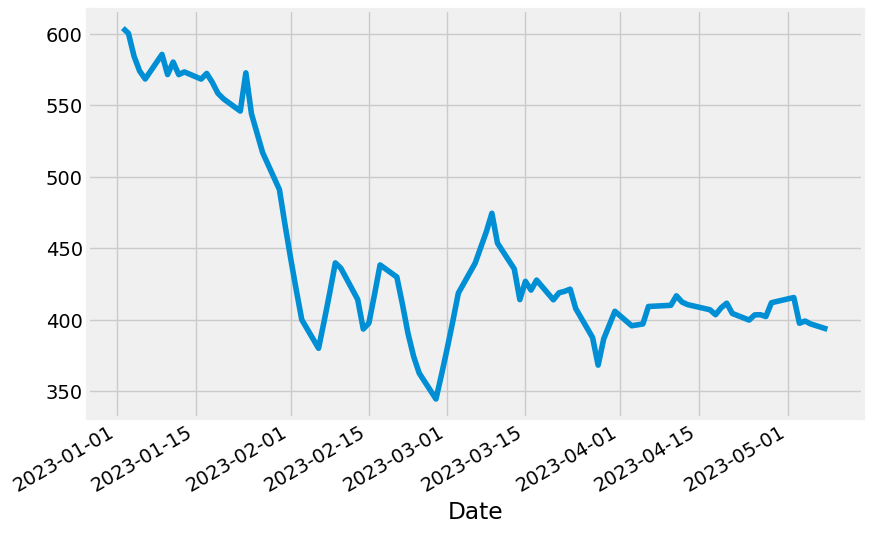